# Widerstandsmoment

## Widerstandsmoment Kreisring

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6b/Traegheitsmoment-2.PNG"/ height=30% width=30%>

Widerstandsmoment des Kreisrings abhängig vom Durchmesser und der Wandstärke.

Populating the interactive namespace from numpy and matplotlib


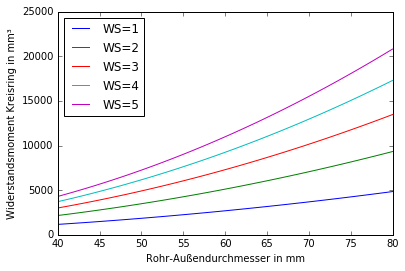

In [1]:
%matplotlib inline
%pylab inline

def widerstandsmoment_kreisring(D, ws):
    d = D - 2*ws
    return pi/32 * ((D**4 - d**4)/D)

x = linspace(40, 80)

for ws in range(1,6):
    plot(x, widerstandsmoment_kreisring(x, ws), label='WS={}'.format(ws))

xlabel("Rohr-Außendurchmesser in mm")
ylabel("Widerstandsmoment Kreisring in mm³")
legend(loc='upper left')

Populating the interactive namespace from numpy and matplotlib
30.36452030804724


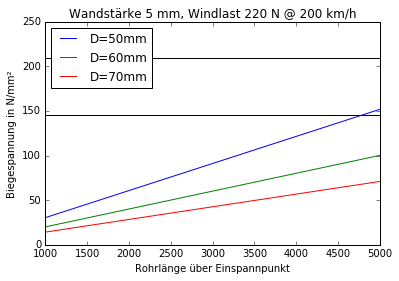

In [2]:
%matplotlib inline
%pylab inline

def biegemoment(wind_load, l):
    return wind_load * l

def biegespannung(f, l, D, ws):
    return biegemoment(f, l) / widerstandsmoment_kreisring(D, ws)

print(biegespannung(220, 1000, 50, 5))

# windload nanobeam with diameter of 300mm: 220.2 N @ 200 km/h

x = linspace(1000,5000)
plot(x, biegespannung(220, x, 50, 5), label='D=50mm')
plot(x, biegespannung(220, x, 60, 5), label='D=60mm')
plot(x, biegespannung(220, x, 70, 5), label='D=70mm')
# streckgrenze gegeben 160-230 siehe Material Datenblatt
hlines(160/1.1, 1000, 5000)
hlines(230/1.1, 1000, 5000)
legend(loc='upper left')
xlabel('Rohrlänge über Einspannpunkt')
ylabel('Biegespannung in N/mm²')
title('Wandstärke 5 mm, Windlast 220 N @ 200 km/h')

[Datenblatt AlMgSi0,5](https://www.gemmel-metalle.de/werkstoffe/legierungsbeschreibung-almgsi0-5f22.html)

Streckgrenze: 160-230

In [3]:
def windlast_rohr(D, l):
    c = 1.2
    q = 1100 / 10**6 # N / mm² Staudurck bei Gebäude > 20m
    return q * c * D * l

print(windlast_rohr(45, 4000))

def biegemoment_rohr(D, l):
    return (windlast_rohr(D, l) * l) / 2

print(biegemoment_rohr(45, 4000))

237.6
475200.0


Populating the interactive namespace from numpy and matplotlib


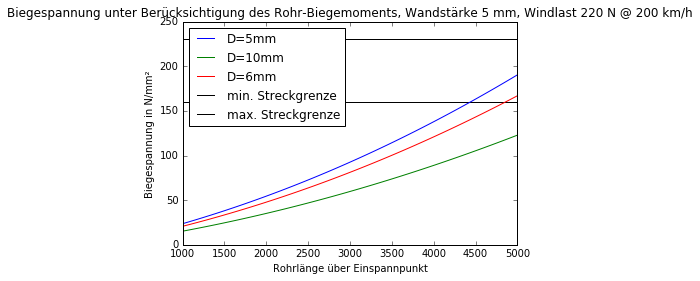

In [4]:
%matplotlib inline
%pylab inline

# windload nanobeam with diameter of 300mm: 220.2 N @ 200 km/h

def biegespannung_kombiniert(f, l, D, ws):
    return (biegemoment_rohr(D, l) + biegemoment(f, l)) / widerstandsmoment_kreisring(D, ws)

x = linspace(1000,5000)
plot(x, biegespannung_kombiniert(220, x, 60, 5), label='D=5mm')
plot(x, biegespannung_kombiniert(220, x, 60, 10), label='D=10mm')
plot(x, biegespannung_kombiniert(220, x, 60, 6), label='D=6mm')
hlines(160, 1000, 5000, label='min. Streckgrenze')
hlines(230, 1000, 5000, label='max. Streckgrenze')
legend(loc='upper left')
xlabel('Rohrlänge über Einspannpunkt')
ylabel('Biegespannung in N/mm²')
title('Biegespannung unter Berücksichtigung des Rohr-Biegemoments, Wandstärke 5 mm, Windlast 220 N @ 200 km/h')

## Durchbiegung

In [5]:
# biegemoment des rohrs nicht berücksichtigt
def durchbiegung(wind_load, l, D, ws):
    E = 70000 # N/mm² (https://www.gemmel-metalle.de/werkstoffe/legierungsbeschreibung-almgsi0-5f22.html)
    return biegemoment(wind_load, l) / (E * widerstandsmoment_kreisring(D, ws))
print(durchbiegung(220, 3, 50, 5))  # richtig???

1.301336584630596e-06


## Berechnung Masse Hohlzylinder:

###Dichte AlMgSi0.5(kg/mm³):

In [9]:
dichte = 2.7 / (100*100*100)

###Volumen Hohlzylinder:

In [10]:
# returns mm³
def volumen_kreisring(l, D, ws):
    d = D - 2*ws
    return ((pi * l) / 4) * (D**2 - d**2)

### Masse

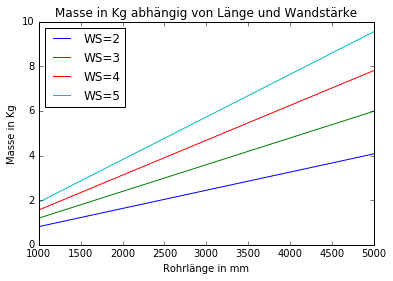

In [11]:
x = linspace(1000, 5000)
plot(x, dichte * volumen_kreisring(x, 50, 2), label='WS=2')
plot(x, dichte * volumen_kreisring(x, 50, 3), label='WS=3')
plot(x, dichte * volumen_kreisring(x, 50, 4), label='WS=4')
plot(x, dichte * volumen_kreisring(x, 50, 5), label='WS=5')
legend(loc='upper left')
xlabel('Rohrlänge in mm')
ylabel('Masse in Kg')
title('Masse in Kg abhängig von Länge und Wandstärke')